### ZCA whitening

(60000, 1, 28, 28)
(60000, 1, 28, 28)


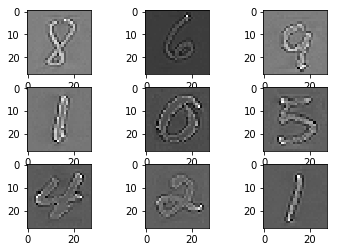

In [2]:
# ZCA whitening
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
K.set_image_dim_ordering('th')
#K.set_image_data_format('channels_last')
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
# convert from int to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# define data preparation

X_train_dup = X_train
print(X_train_dup.shape)
print(X_train.shape)
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(X_train_dup)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train_dup, y_train, batch_size=128):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

#### Feature standardization

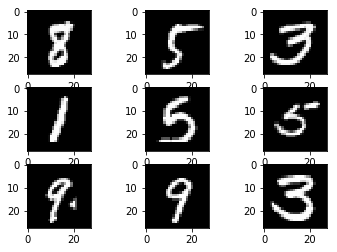

In [12]:
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=16):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

#### Random Rotations

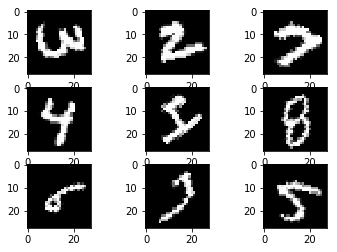

In [14]:

# define data preparation
datagen = ImageDataGenerator(rotation_range=90)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

#### Random Shifts

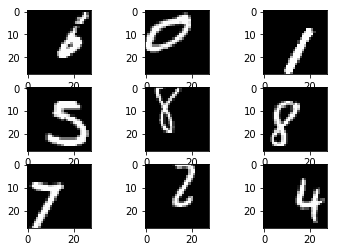

In [15]:

# define data preparation
shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)
# fit parameters from data
datagen.fit(X_train)
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		pyplot.subplot(330 + 1 + i)
		pyplot.imshow(X_batch[i].reshape(28, 28), cmap=pyplot.get_cmap('gray'))
	# show the plot
	pyplot.show()
	break

In [1]:
x = [[2,4,6], [5,7,9]]
x

[[2, 4, 6], [5, 7, 9]]

In [4]:
newList = map(lambda x1: x1/2, x)

In [7]:
import numpy as np
newList = np.array(x)

In [8]:
newList


array([[2, 4, 6],
       [5, 7, 9]])

In [9]:
n = newList/2

In [10]:
n

array([[ 1. ,  2. ,  3. ],
       [ 2.5,  3.5,  4.5]])

In [7]:
print(np.arange(1, 6, 1))

[1 2 3 4 5]


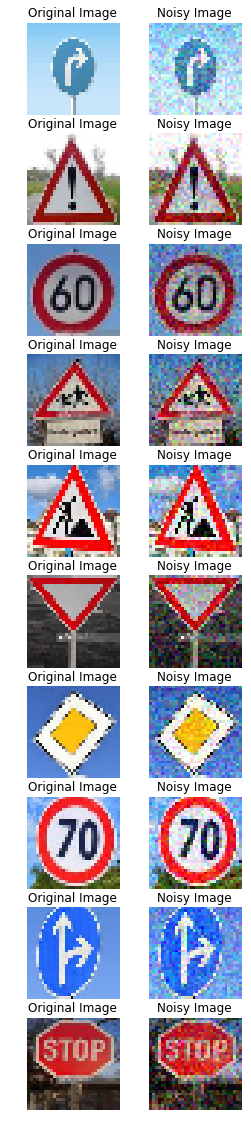

In [6]:
import cv2
import glob
import numpy as np
import skimage
import matplotlib.pyplot as plt
%matplotlib inline

def sharpen_img(img):
    gb = cv2.GaussianBlur(img, (5,5), 20.0)
    return cv2.addWeighted(img, 2, gb, -1, 0)

def add_gauss_noise(image):
      row,col,ch= image.shape
      print(row,col,ch)
      mean = 0
      var = 0.1
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row, col, ch))
      gauss = gauss.reshape(row, col, ch)
      noisy = image + gauss
      return noisy

test_imgs = [img_path for img_path in glob.glob("./test_imgs/*")]
test_img = np.uint8(np.zeros((10,32,32,3)))
index = 0
for imp in (test_imgs):
    img = cv2.imread(imp, cv2.IMREAD_COLOR)
    # resize the image to 30x30
    resized_image = cv2.resize(img, (32, 32)) 
    b,g,r = cv2.split(resized_image)
    img = cv2.merge([r,g,b])
    test_img[index] = img
    index += 1

plt.figure(figsize=(4,20))
for i in range(0, 10):
    image = test_img[i]
    plt.subplot(10, 2, 2*i+1)
    #print(image.shape)
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')
    
    noisy_image =  skimage.util.random_noise(image)
    plt.subplot(10, 2, 2*i+2)
    plt.imshow(noisy_image)
    plt.title('Noisy Image')
    plt.axis('off')


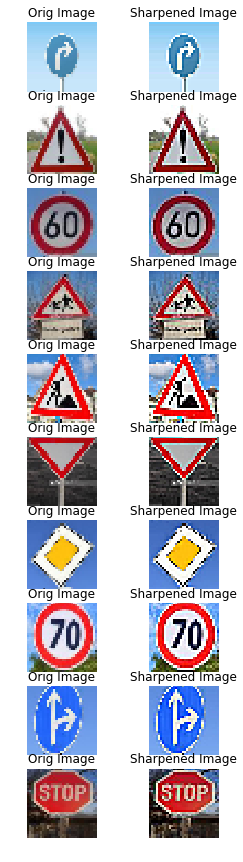

In [5]:
#Sharpen
from scipy import ndimage


plt.figure(figsize=(4,15))
for i in range(0, 10):
    
    image = test_img[i]
    plt.subplot(10, 2, 2*i+1)
    #print(image.shape)
    plt.imshow(image)
    plt.title('Orig Image')
    plt.axis('off')
    '''
    blurred_f = ndimage.gaussian_filter(image, 3)
    filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
    alpha = 1
    sharpened = blurred_f #alpha * (blurred_f - filter_blurred_f)
    '''
    blurred_f = cv2.GaussianBlur(image, (3,3), 10.0)
    sharpened = cv2.addWeighted(image, 2, blurred_f, -1, 0)
    plt.subplot(10, 2, 2*i+2)
    plt.imshow(sharpened)
    plt.title('Sharpened Image')
    plt.axis('off')


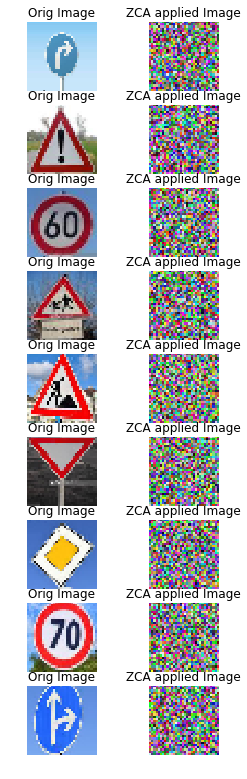

In [12]:
# ZCA Whitening on test images
# ZCA whitening
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
from keras import backend as K
K.set_image_dim_ordering('tf')
plt.figure(figsize=(4,15))
datagen = ImageDataGenerator(zca_whitening=True)
# fit parameters from data
datagen.fit(test_img)
y_train = [1,2,3,4,5,6,7,8,9,10]
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(test_img, y_train, batch_size=10):
    # create a grid of 3x3 images
    for i in range(0, 9):
        image = test_img[i]
        plt.subplot(10, 2, 2*i+1)
        #print(image.shape)
        plt.imshow(image)
        plt.title('Orig Image')
        plt.axis('off')

        plt.subplot(10, 2, 2*i+2)
        plt.imshow(X_batch[i])
        plt.title('ZCA applied Image')
        plt.axis('off')

    plt.show()
    break

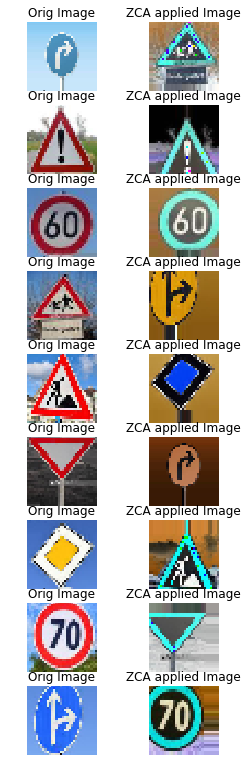

In [14]:

shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, height_shift_range=shift)

# fit parameters from data
datagen.fit(test_img)
y_train = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(4,15))
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(test_img, y_train, batch_size=10):
    # create a grid of 10x2 images
    for i in range(0, 9):
        image = test_img[i]
        plt.subplot(10, 2, 2*i+1)
        #print(image.shape)
        plt.imshow(image)
        plt.title('Orig Image')
        plt.axis('off')

        plt.subplot(10, 2, 2*i+2)
        plt.imshow(X_batch[i])
        plt.title('Shifted Image')
        plt.axis('off')

    plt.show()
    break

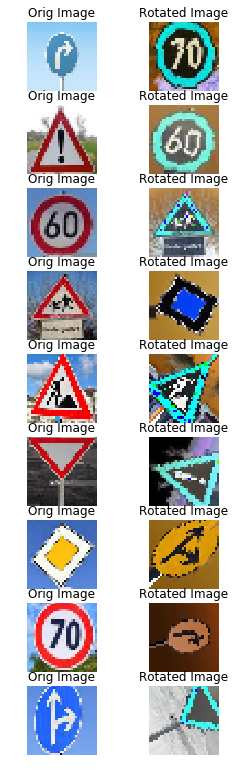

In [21]:
test_imgs = [img_path for img_path in glob.glob("./test_imgs/*")]
test_img = np.uint8(np.zeros((10,32,32,3)))
index = 0
for imp in (test_imgs):
    img = cv2.imread(imp, cv2.IMREAD_COLOR)
    # resize the image to 30x30
    resized_image = cv2.resize(img, (32, 32)) 
    b,g,r = cv2.split(resized_image)
    img = cv2.merge([r,g,b])
    test_img[index] = img
    index += 1

datagen = ImageDataGenerator(rotation_range=90)

# fit parameters from data
datagen.fit(test_img)
y_train = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(4,15))
# configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(test_img, y_train, batch_size=10):
    # create a grid of 10x2 images
    for i in range(0, 9):
        image = test_img[i]
        plt.subplot(10, 2, 2*i+1)
        #print(image.shape)
        plt.imshow(image)
        plt.title('Orig Image')
        plt.axis('off')

        plt.subplot(10, 2, 2*i+2)
        plt.imshow(X_batch[i])
        plt.title('Rotated Image')
        plt.axis('off')

    plt.show()
    break

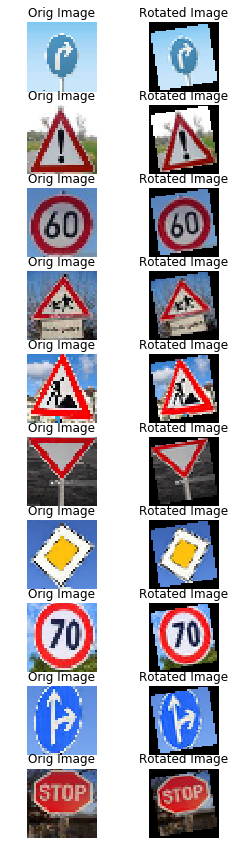

In [31]:
# rotate using imutils


plt.figure(figsize=(4,15))
for i in range(0, 10):
    
    image = test_img[i]
    plt.subplot(10, 2, 2*i+1)
    #print(image.shape)
    plt.imshow(image)
    plt.title('Orig Image')
    plt.axis('off')
    '''
    blurred_f = ndimage.gaussian_filter(image, 3)
    filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
    alpha = 1
    sharpened = blurred_f #alpha * (blurred_f - filter_blurred_f)
    '''
    rotated = ndimage.rotate(image, 10)
    plt.subplot(10, 2, 2*i+2)
    plt.imshow(rotated)
    plt.title('Rotated Image')
    plt.axis('off')

(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)
(32, 32, 3)


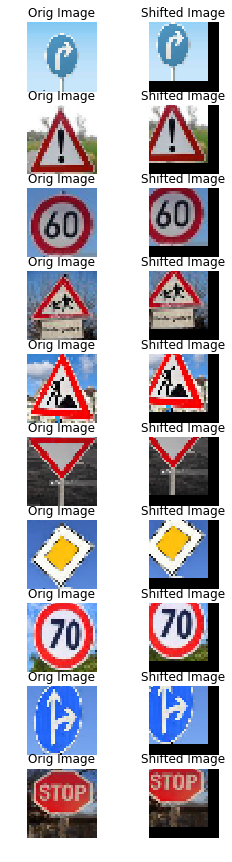

In [32]:
# Shift of images


plt.figure(figsize=(4,15))
for i in range(0, 10):
    
    image = test_img[i]
    plt.subplot(10, 2, 2*i+1)
    #print(image.shape)
    plt.imshow(image)
    plt.title('Orig Image')
    plt.axis('off')
    '''
    blurred_f = ndimage.gaussian_filter(image, 3)
    filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
    alpha = 1
    sharpened = blurred_f #alpha * (blurred_f - filter_blurred_f)
    '''
    print(image.shape)
    rows,cols, channels = image.shape
    M = np.float32([[1,0,-5],[0,1,-5]])
    shifted = cv2.warpAffine(image, M, (cols,rows))
    plt.subplot(10, 2, 2*i+2)
    plt.imshow(shifted)
    plt.title('Shifted Image')
    plt.axis('off')

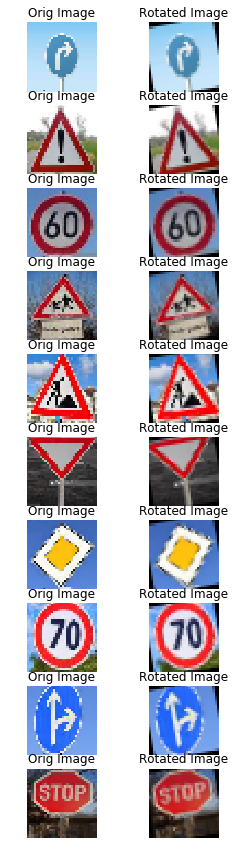

In [38]:
plt.figure(figsize=(4,15))
for i in range(0, 10):
    
    image = test_img[i]
    plt.subplot(10, 2, 2*i+1)
    #print(image.shape)
    plt.imshow(image)
    plt.title('Orig Image')
    plt.axis('off')
    '''
    blurred_f = ndimage.gaussian_filter(image, 3)
    filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
    alpha = 1
    sharpened = blurred_f #alpha * (blurred_f - filter_blurred_f)
    '''
    #print(image.shape)
    rows,cols, channels = image.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2), 10, 1)
    rotated = cv2.warpAffine(image, M, (cols,rows))
    plt.subplot(10, 2, 2*i+2)
    plt.imshow(rotated)
    plt.title('Rotated Image')
    plt.axis('off')


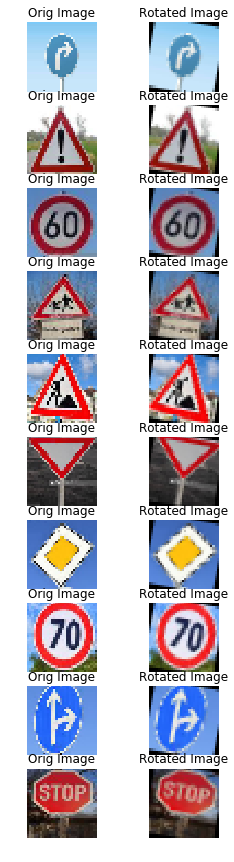

In [39]:
plt.figure(figsize=(4,15))
for i in range(0, 10):
    
    image = test_img[i]
    plt.subplot(10, 2, 2*i+1)
    #print(image.shape)
    plt.imshow(image)
    plt.title('Orig Image')
    plt.axis('off')
    '''
    blurred_f = ndimage.gaussian_filter(image, 3)
    filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
    alpha = 1
    sharpened = blurred_f #alpha * (blurred_f - filter_blurred_f)
    '''
    #print(image.shape)
    rows,cols, channels = image.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2), -10, 1)
    rotated = cv2.warpAffine(image, M, (cols,rows))
    plt.subplot(10, 2, 2*i+2)
    plt.imshow(rotated)
    plt.title('Rotated Image')
    plt.axis('off')


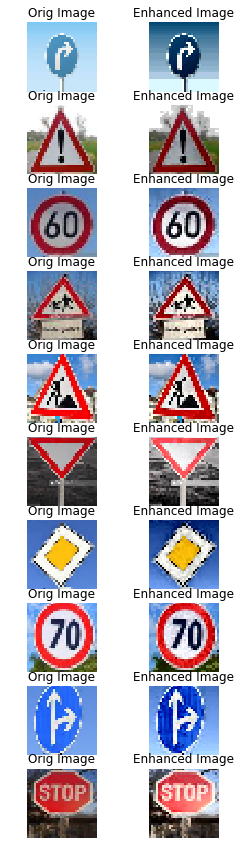

In [43]:
# Equilize histogram

plt.figure(figsize=(4,15))
for i in range(0, 10):
    
    image = test_img[i]
    plt.subplot(10, 2, 2*i+1)
    #print(image.shape)
    plt.imshow(image)
    plt.title('Orig Image')
    plt.axis('off')
    '''
    blurred_f = ndimage.gaussian_filter(image, 3)
    filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
    alpha = 1
    sharpened = blurred_f #alpha * (blurred_f - filter_blurred_f)
    '''
    #print(image.shape)
    img_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    # equalize the histogram of the Y channel
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    # convert the YUV image back to RGB format
    img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)    
    plt.subplot(10, 2, 2*i+2)
    plt.imshow(img_output)
    plt.title('Enhanced Image')
    plt.axis('off')